# Importing necessary libraries and data

## Description
### Context
The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximize earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones that exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.

 

### Objective
Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

 

### Data Description
The data provided is of stock prices and some financial indicators like ROE, earnings per share, P/E ratio, etc.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from scipy.stats import zscore

# to scale the data using standard scaler
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

In [2]:
# Import data
data=pd.read_csv("C:/Users/Konto/Documents/ESTUDOS/Texas university/Unsupervised learning/Trade&Ahead/stock_data.csv")

## Data Overview

- Observations
- Sanity checks

In [3]:
data.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [4]:
data.shape

(340, 15)

In [5]:
data.describe()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
count,340.000000,340.000000,340.000000,340.000000,340.000000,3.400000e+02,3.400000e+02,340.000000,3.400000e+02,340.000000,340.000000
mean,80.862345,4.078194,1.525976,39.597059,70.023529,5.553762e+07,1.494385e+09,2.776662,5.770283e+08,32.612563,-1.718249
std,98.055086,12.006338,0.591798,96.547538,90.421331,1.946365e+09,3.940150e+09,6.587779,8.458496e+08,44.348731,13.966912
min,4.500000,-47.129693,0.733163,1.000000,0.000000,-1.120800e+10,-2.352800e+10,-61.200000,2.767216e+07,2.935451,-76.119077
25%,38.555000,-0.939484,1.134878,9.750000,18.000000,-1.939065e+08,3.523012e+08,1.557500,1.588482e+08,15.044653,-4.352056
50%,59.705000,4.819505,1.385593,15.000000,47.000000,2.098000e+06,7.073360e+08,2.895000,3.096751e+08,20.819876,-1.067170
75%,92.880001,10.695493,1.695549,27.000000,99.000000,1.698108e+08,1.899000e+09,4.620000,5.731175e+08,31.764755,3.917066
max,1274.949951,55.051683,4.580042,917.000000,958.000000,2.076400e+10,2.444200e+10,50.090000,6.159292e+09,528.039074,129.064585


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

- Data has 15 columns with 340 rows 
- There are no missing values or duplicates in the data set
- Most attributes (columns) are populated with large amount of unique values
- GICS Sector is the only entity with small number of unique values
- None of the indexes have values that seem incorrect, despite many outliers and extremes.

In [7]:
data.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

In [8]:
data.nunique()

Ticker Symbol                   340
Security                        340
GICS Sector                      11
GICS Sub Industry               104
Current Price                   336
Price Change                    340
Volatility                      340
ROE                              82
Cash Ratio                      124
Net Cash Flow                   332
Net Income                      335
Earnings Per Share              268
Estimated Shares Outstanding    323
P/E Ratio                       295
P/B Ratio                       299
dtype: int64

In [9]:
data.duplicated().sum() 

0

Since we are suppossed to group the stocks in order to create a portifolio to maximize the return of customers, the high number of individual entries allow a good mix. 
A good stock should provide positive returns over time with low risk and volatility, usually this is the case when the following performance measures are positive (ROE, Cash Ratio, NCF, Net income, Earnings per share). 

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

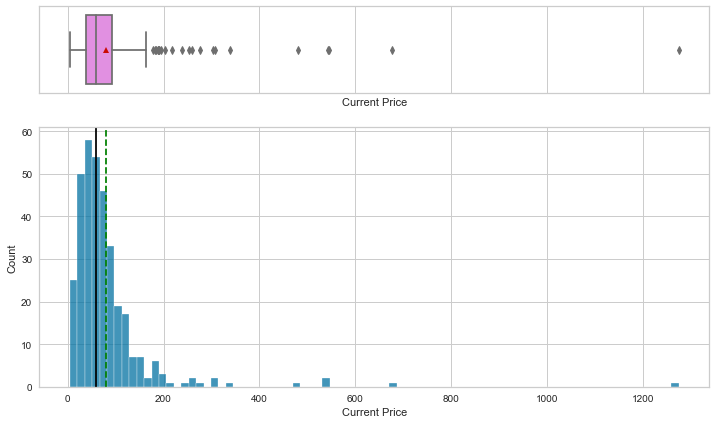

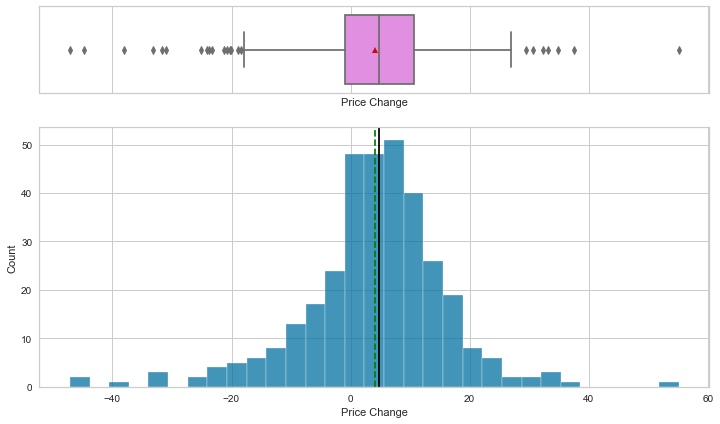

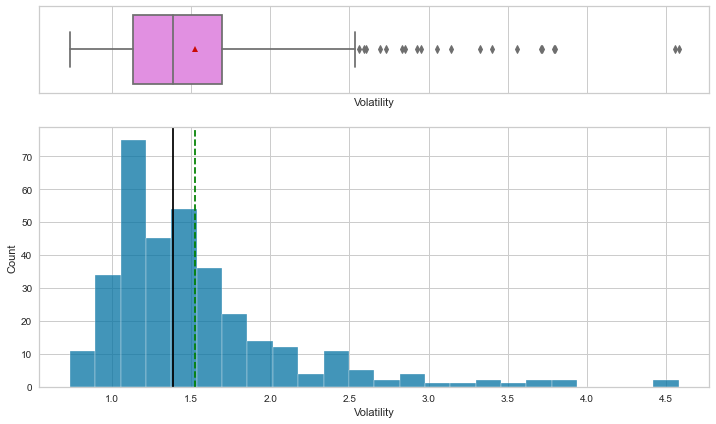

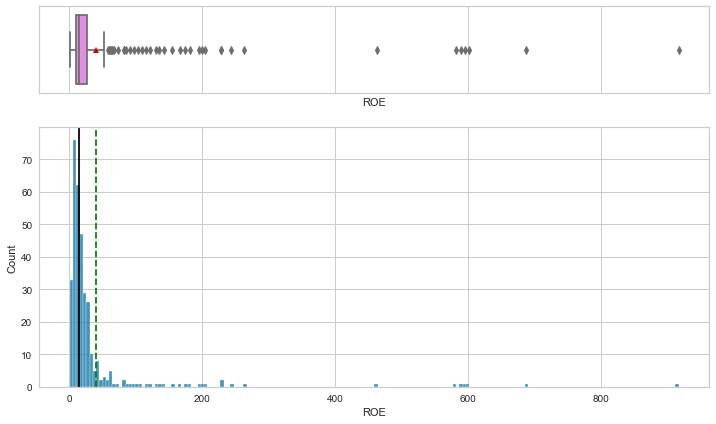

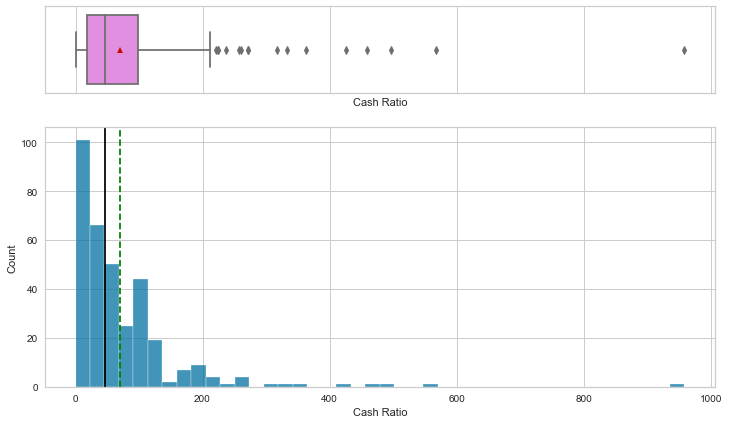

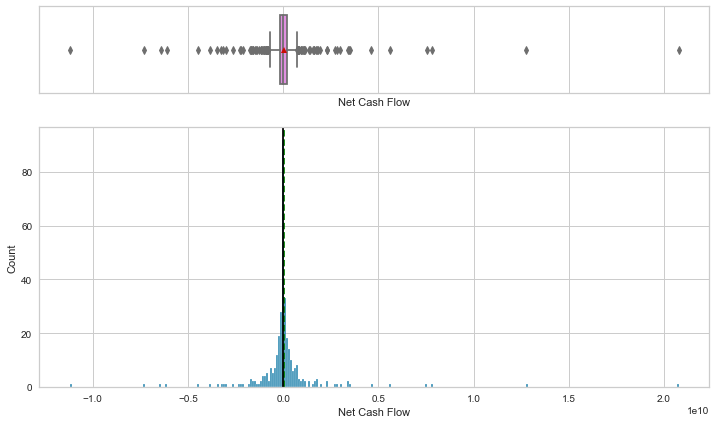

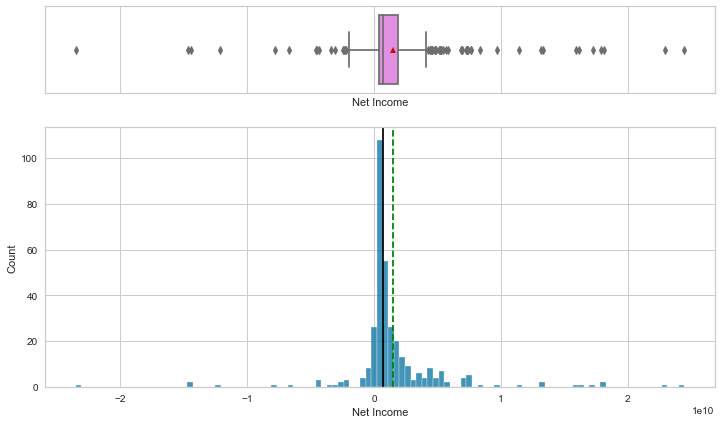

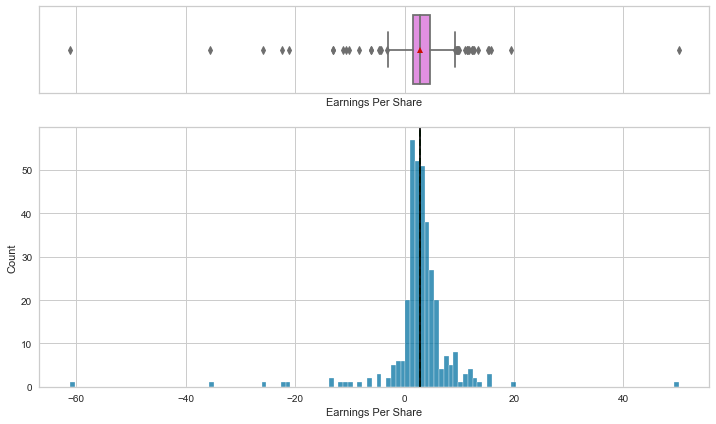

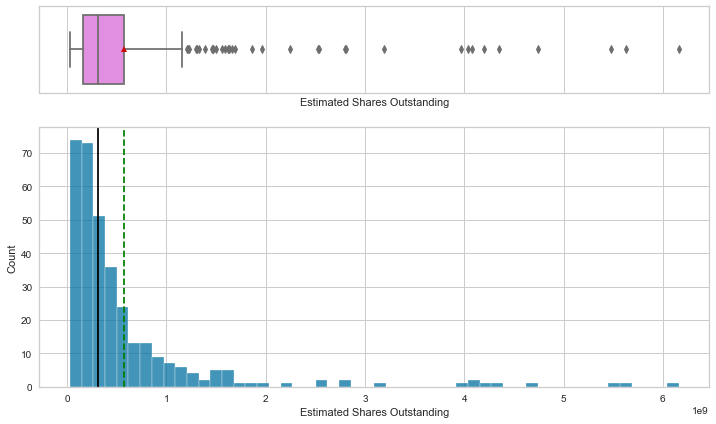

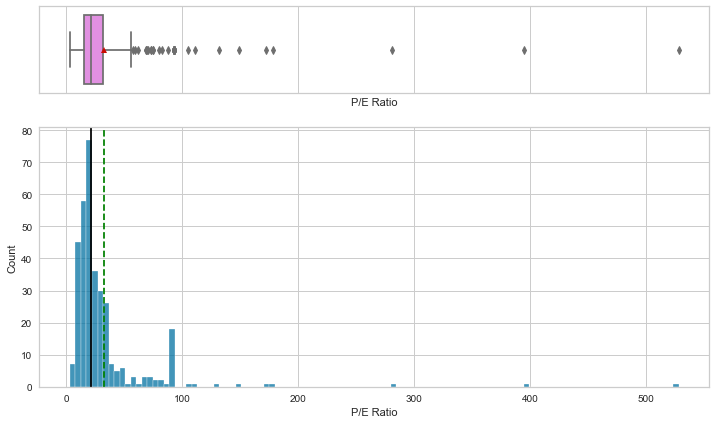

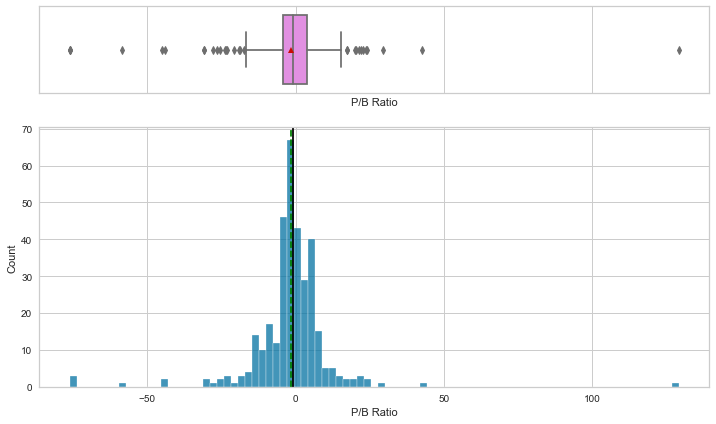

In [11]:
# selecting numerical columns
num_col = data.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(data, item)

Since we have a fairly good amount of data from different stocks, you can see above that the distributions are quiet disperse and all attributes have many outliers. Depending on the period of the data collection, this spread may strongly reflect  macroeconomic factors, like corona crises (2019), financial market meltdown(2007) etc.
Because of the characteristics of each financial indicators we can assume the following:
- Current Price has a wide range of values, distribution is right skewed with many outliers. The price of a stock is not an indicator of stock performance or financial health. Therefore, Price should not have any influence on the stocks we choose.
- Price Change is normaly distributed with average and media just slightly above zero with most observations between zero and 10. Which means that average market return for the period in analysis would be in this zone - stocks chosen in this list provide positive return at an average of +5% to +10% . There are outliers to the left and to the right (positive and negative). 
- Volatility is an statistical measure of risk and closely related to price change (standard deviation of price). It is right skewed. Average and mean values are close to 1.5. Most observations are skewed to the right, so the risk of stocks are concentrated between Q1 and Q3. If the graph would be skewed to the left, we could assume that the stock choosen were very risky and had high price variance (not the case).
- ROE show a huge spread between the values, though average and mean are close to zero. The graph is highly skewed to the righ and there are some very extreme outliers. The outliers show stocks with high earnings ratio compared to equity value, though a deeper analysis should check for long term ROE, since results of one quarter may be influenced by extraordinary effects.
- Cash Ratio has also a wide spread, the graph is skewed to the right with some extreme outliers. Average and Mean are between Q1 and Q3. Cash Ratio does not provide insights of cash generation on its activities, but more if the company has enough money in the 'bank account' to pay debts.
- Net Cash Flow  & Net income have huge distribution spread, though most of the data is concentrated close to zero as well as the mean and average. There are a lot of outliers in the observation. Bigger companies with higher monetary earnings will probably have higher figures, but this is not a indication of the performance, because it is also necessary to look at earnings. Bank of America or Intel have high income and net cash flow values, but that does not mean they have "better" cash ratio or earnings level than smaller companies in the same sector. 
- Earnings per share also have huge distribution spread, most of the data is also concentrated close to zero as well as the mean and average. There are a lot of outliers in the observation.  EPS is a measure of performance for the period as its shows the earnings of each share for the period, or the money generated by the company for each piece of share. 
- P/E Ratio and P/B Ratio are ratios that show the actual price of stock compared either to Earnings or book. Mean and average are close to zero and both have substiancial number of outliers. These Ratios are a good measure of how expensive or cheap an stock is compared to its Earnings or Equity value .

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
   
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

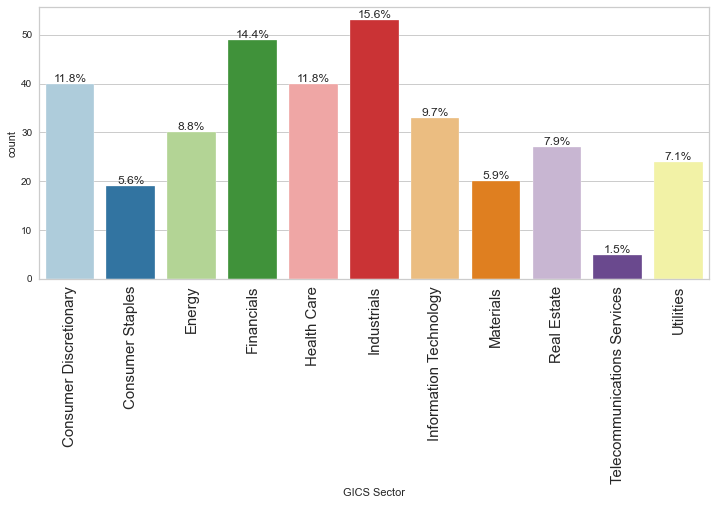

In [13]:
# let's explore sector profile
labeled_barplot(data, "GICS Sector", perc=True)

The dataset is more concentrated on industrial and financial sectors. Among the eleven sectors available, the top four sectors in the data represent 50% of the total (Industrials, Financials, Consumer Discretionary, Health Care).  

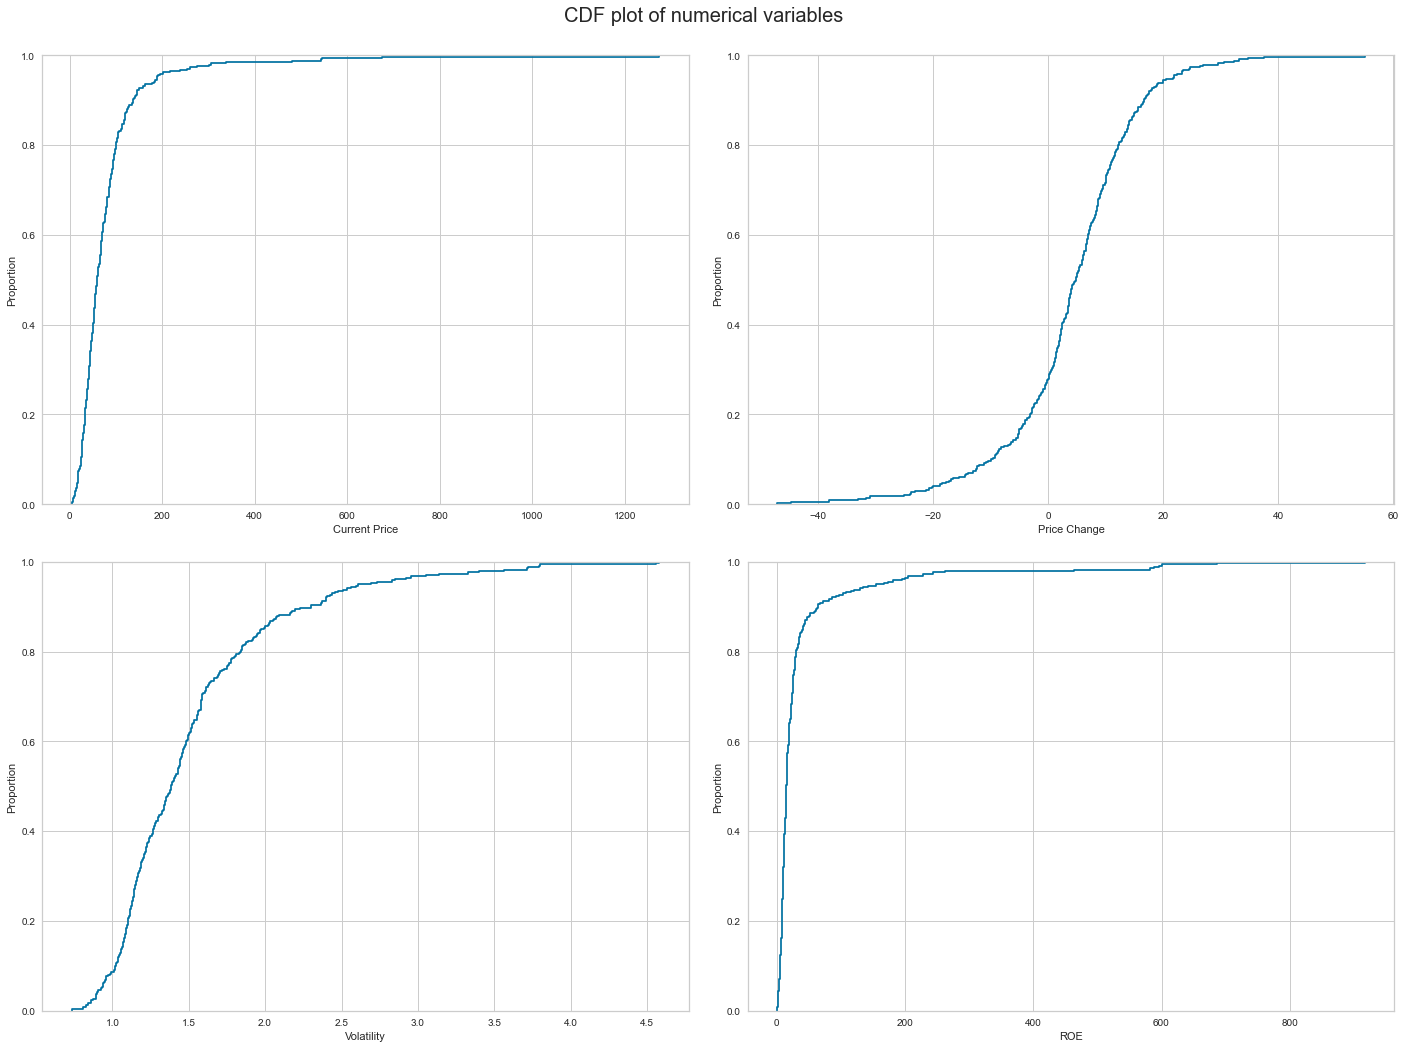

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(2):
    sns.ecdfplot(ax=axes[ii][0], x=data[num_col[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=data[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

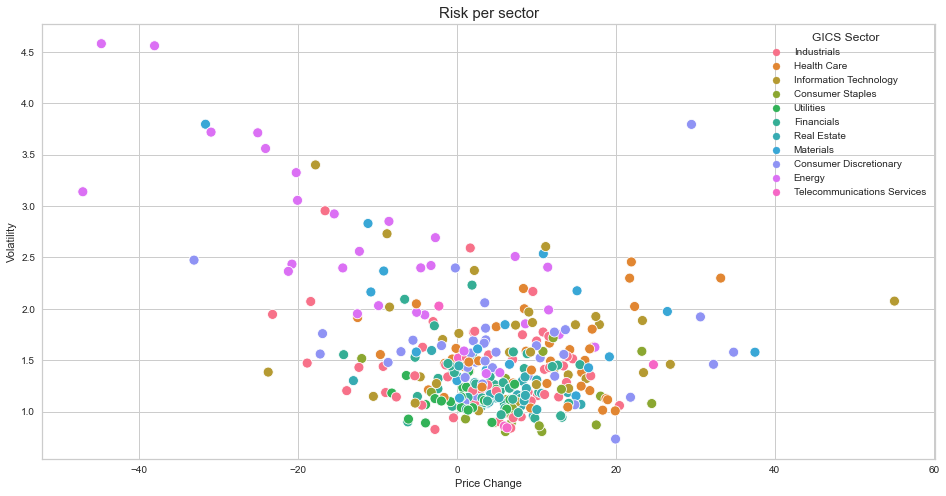

In [15]:
plt.figure(figsize=(16, 8))
plt.title('Risk per sector', size= 15)
sns.scatterplot(y= "Volatility", x="Price Change", s = 100, hue = 'GICS Sector', data=data)
plt.show()

Price change and Volatility show the risk associated with the stock. Stocks with high volatility also have high price changes, resulting in possible high gains or losses to customers.The stocks with high negative price change and high volatility are definately not a good investiment and we can see that mostly come from Energy or Materials sector.

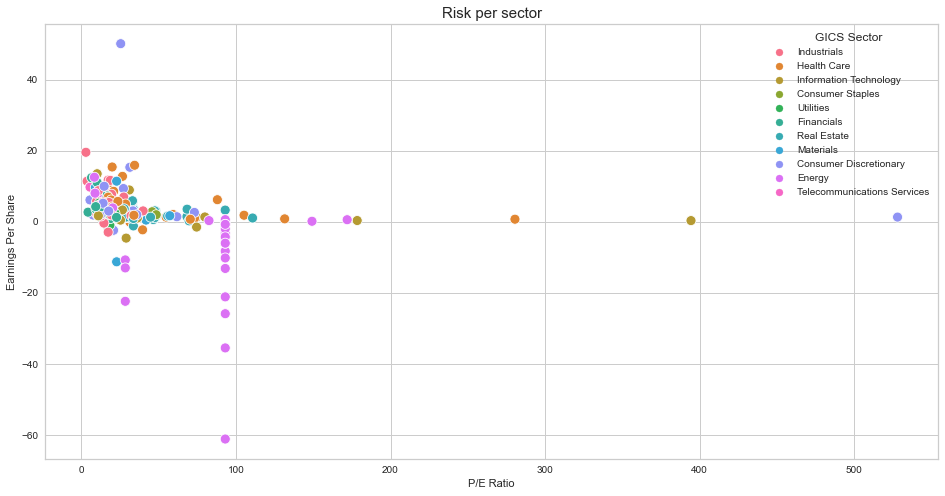

In [16]:
plt.figure(figsize=(16, 8))
plt.title('Risk per sector', size= 15)
sns.scatterplot(y= "Earnings Per Share", x="P/E Ratio", s = 100, hue = 'GICS Sector', data=data)
plt.show()

Earnings per share and P/E Ratio shows if the company actually earns money from its activity. If Earnings are above zero, the company is making money and generating return on its activities. The higher earnings a company has, the higher is its hability to make money from activities, or maximize the return on investiments. Again, most of the companies with Earnings per Share below zero belong to Energy sector, despite the fact that some of them have a good P/E Ratio, which shows that their stock price is still high compared to the earnings of the period. Since we are talking about 13 weeks period, this may be just a bad earning season for some companies or a temporary economic downturn.

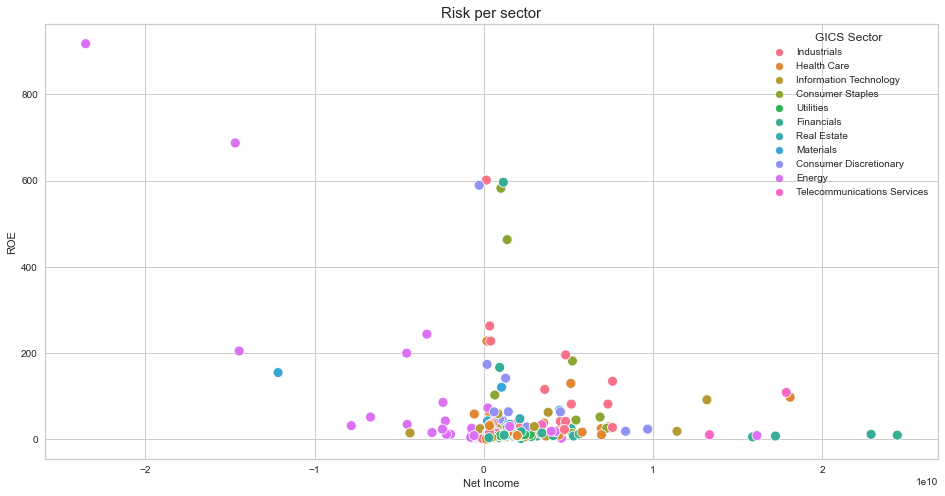

In [17]:
plt.figure(figsize=(16, 8))
plt.title('Risk per sector', size= 15)
sns.scatterplot(y= "ROE", x="Net Income", s = 100, hue = 'GICS Sector', data=data)
plt.show()

Similar observation as before, net income represents the profits or loss that an organization is making for a certain period of time (same as earnings). Net Income > 0 is a sign the company is profitable, otherwise the company makes losses on business. ROE is the amount of income divided by  the Shareholders Equity. Energy stocks have more presence in the negative territory of Net income, despite some high ROE.

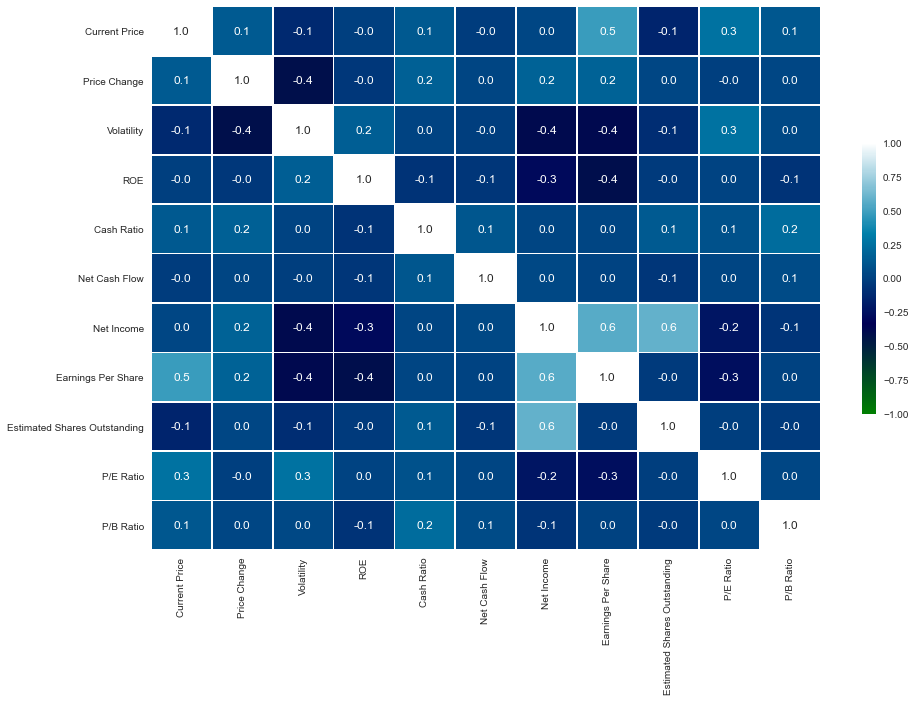

In [18]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    data[num_col].corr(),
    cmap="ocean",
    annot=True,
    fmt=".1f",
    vmin=-1,
    vmax=1,
    center=0,
    square=False,
    linewidths=0.7,
    cbar_kws={"shrink": 0.5},
)
plt.show()

The graph above or below show that none of the variables have a correlation higher than 0.6 
All indicators are highly independent

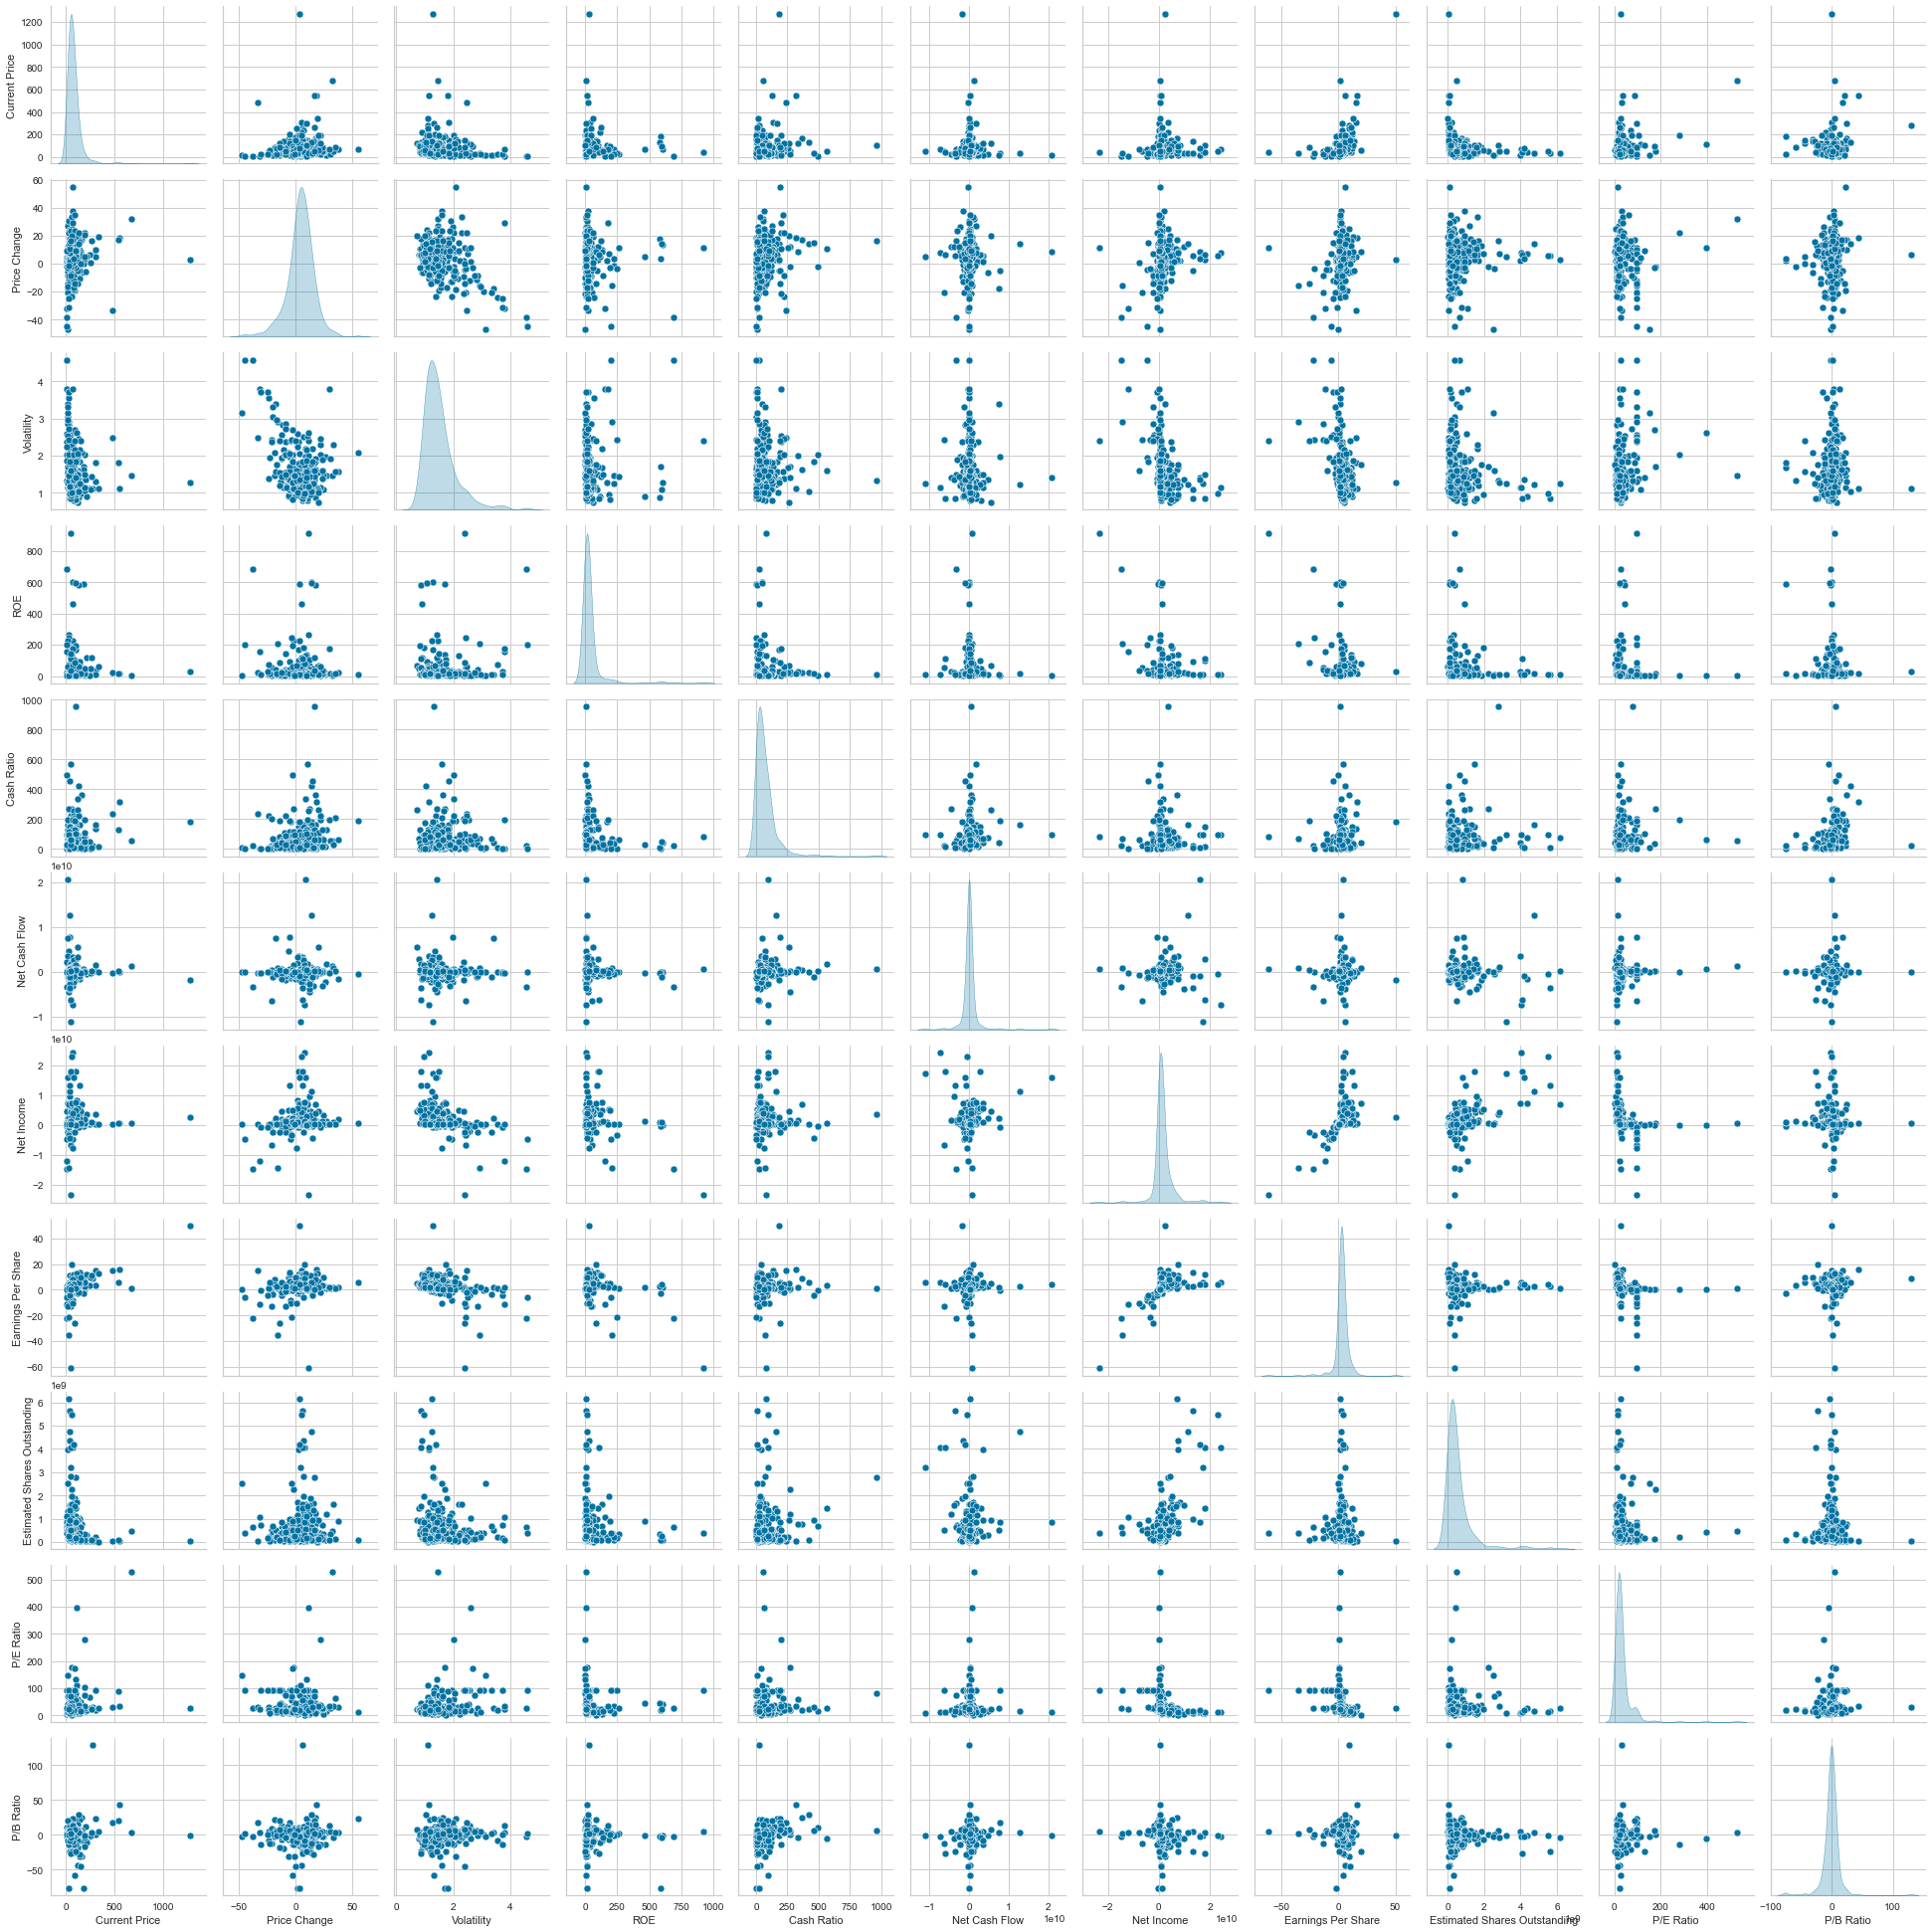

In [19]:
sns.pairplot(data=data[num_col], diag_kind="kde")
plt.show()

## Data Preprocessing



- **Outliers will not be treated in any indicator because clustering the figures will already provide inside about them, the outliers indicate that one stock is probably too risky to invest and we should avoid them**


In [20]:
df = data.copy()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

**All the variables below will be deleted**

- GICS Sector and GICS Sub Industry are non numerical variables and not needed for the analysis
- Price is only an indicative of the stock price in the market, but does not provide any insight on health or financial situation
- Estimated Shares Outstanding also has not link with the stock financial situation, it only indicates if the stocks has enough holders to be handled (liquity level)

In [22]:
df.drop(df.columns[[2, 3, 4, 12]], axis = 1, inplace = True)

In [23]:
# variables used for clustering
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
numerical_col

['Price Change',
 'Volatility',
 'ROE',
 'Cash Ratio',
 'Net Cash Flow',
 'Net Income',
 'Earnings Per Share',
 'P/E Ratio',
 'P/B Ratio']

In [24]:
df[numerical_col].head()

,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,P/E Ratio,P/B Ratio
0,9.999995,1.687151,135,51,-604000000,7610000000,11.39,3.718174,-8.784219
1,8.339433,2.197887,130,77,51000000,5144000000,3.15,18.806350,-8.750068
2,11.301121,1.273646,21,67,938000000,4423000000,2.94,15.275510,-0.394171
3,13.977195,1.357679,9,180,-240840000,629551000,1.26,74.555557,4.199651
4,-1.827858,1.701169,14,272,315120000,696878000,0.31,178.451613,1.059810


In [25]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = df[numerical_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [26]:
subset.head()

,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,P/E Ratio,P/B Ratio
0,9.999995,1.687151,135,51,-604000000,7610000000,11.39,3.718174,-8.784219
1,8.339433,2.197887,130,77,51000000,5144000000,3.15,18.806350,-8.750068
2,11.301121,1.273646,21,67,938000000,4423000000,2.94,15.275510,-0.394171
3,13.977195,1.357679,9,180,-240840000,629551000,1.26,74.555557,4.199651
4,-1.827858,1.701169,14,272,315120000,696878000,0.31,178.451613,1.059810


In [27]:
# creating a dataframe of the scaled columns
scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [28]:
# checking the mean : most are close to zero
np.mean(scaled_df)

Price Change         -4.571507e-18
Volatility           -7.061345e-17
ROE                   2.873518e-17
Cash Ratio           -8.196058e-17
Net Cash Flow        -7.224613e-18
Net Income            6.040919e-18
Earnings Per Share    4.555180e-17
P/E Ratio             8.816477e-18
P/B Ratio             4.204153e-17
dtype: float64

In [29]:
# checking the standard deviation: most have deviation of one
np.std(scaled_df)

Price Change          1.0
Volatility            1.0
ROE                   1.0
Cash Ratio            1.0
Net Cash Flow         1.0
Net Income            1.0
Earnings Per Share    1.0
P/E Ratio             1.0
P/B Ratio             1.0
dtype: float64

# K-means Clustering

Calculating the best number of clusters to be used with Kmeans
Since we have a substancial amount of stock to compare, lets run cluster between 1 and 20.

C:\Users\Konto\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of Clusters: 1 	Average Distortion: 2.291334546507272
Number of Clusters: 2 	Average Distortion: 2.1231562174739462
Number of Clusters: 3 	Average Distortion: 2.0353469953622048
Number of Clusters: 4 	Average Distortion: 1.96614632859109
Number of Clusters: 5 	Average Distortion: 1.898498628477793
Number of Clusters: 6 	Average Distortion: 1.8608032770125784
Number of Clusters: 7 	Average Distortion: 1.8096147381792007
Number of Clusters: 8 	Average Distortion: 1.739886751535327
Number of Clusters: 9 	Average Distortion: 1.6775153046558107
Number of Clusters: 10 	Average Distortion: 1.6267548084700005
Number of Clusters: 11 	Average Distortion: 1.5808056260291417
Number of Clusters: 12 	Average Distortion: 1.5468417542259705
Number of Clusters: 13 	Average Distortion: 1.5170612540041755
Number of Clusters: 14 	Average Distortion: 1.4922749243897802
Number of Clusters: 15 	Average Distortion: 1.4626816809412122
Number of Clusters: 16 	Average Distortion: 1.4121575793358427
Number

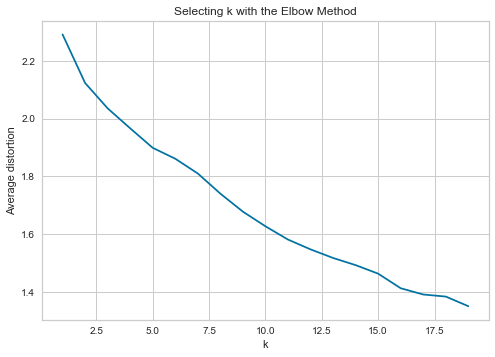

In [30]:
clusters = range(1, 20)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(scaled_df)
    prediction = model.predict(scaled_df)
    distortion = (
        sum(
            np.min(cdist(scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

For n_clusters = 2, the silhouette score is 0.5547778217803349)
For n_clusters = 3, the silhouette score is 0.5548387971469004)
For n_clusters = 4, the silhouette score is 0.5711201045265456)
For n_clusters = 5, the silhouette score is 0.5577624956728012)
For n_clusters = 6, the silhouette score is 0.22551406358347442)
For n_clusters = 7, the silhouette score is 0.23374727585248514)
For n_clusters = 8, the silhouette score is 0.5607369148224495)
For n_clusters = 9, the silhouette score is 0.24660051910906897)
For n_clusters = 10, the silhouette score is 0.245812807376711)
For n_clusters = 11, the silhouette score is 0.2563008018654014)
For n_clusters = 12, the silhouette score is 0.2166840084121842)
For n_clusters = 13, the silhouette score is 0.2495712534530869)
For n_clusters = 14, the silhouette score is 0.2512352891585864)
For n_clusters = 15, the silhouette score is 0.2312059166362016)
For n_clusters = 16, the silhouette score is 0.23391822257262165)
For n_clusters = 17, the silho

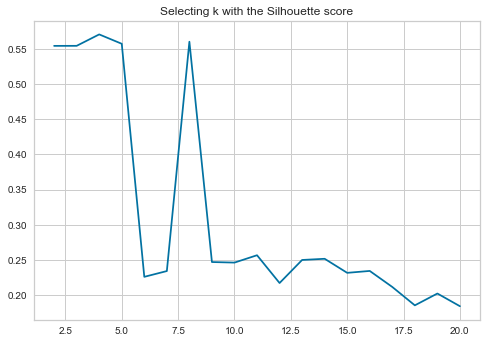

In [93]:
sil_score = []
cluster_list = list(range(2, 21))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.title("Selecting k with the Silhouette score")
plt.show()

### Based on the Elbow Graph and Shillouette Graph the number of clusters shall be between 7 and 10.

Lets check all the possibilities below

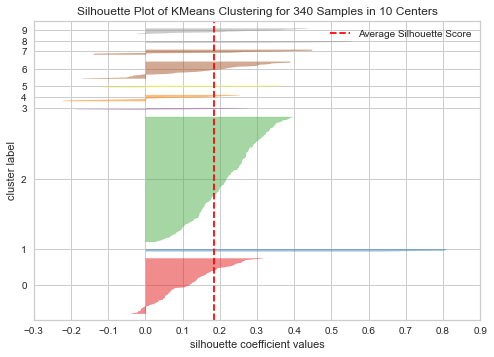

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [32]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(10, random_state=1))
visualizer.fit(scaled_df)
visualizer.show()

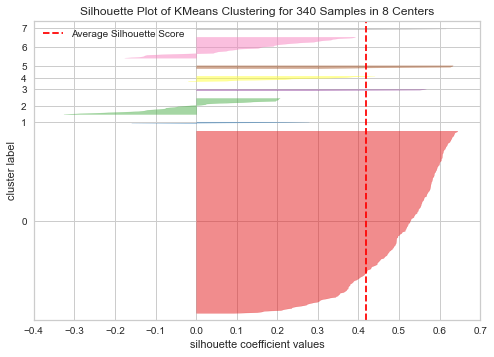

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [33]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer.fit(scaled_df)
visualizer.show()

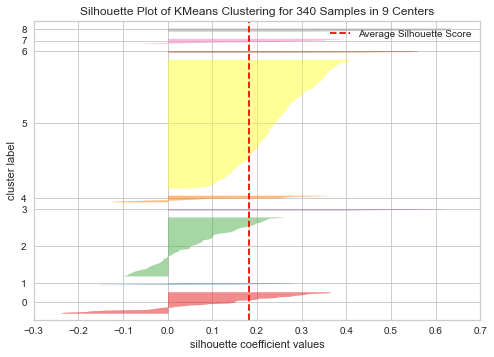

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [34]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(9, random_state=1))
visualizer.fit(scaled_df)
visualizer.show()

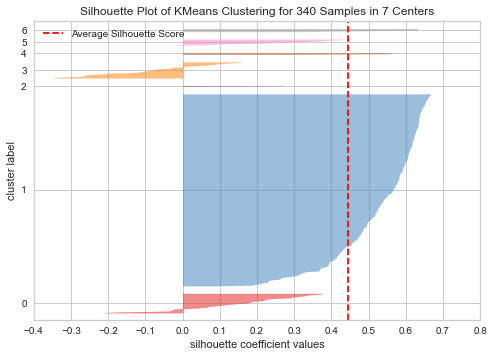

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [35]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(scaled_df)
visualizer.show()

### **Lets run 10 Clusters, since it shows all labels with a coefficient value above the average silhouette score**

# K-Means Scale

In [36]:
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(scaled_df)

KMeans(n_clusters=10, random_state=0)

In [37]:
df["K_means_segments"] = kmeans.labels_
scaled_df["K_means_segments"] = kmeans.labels_

In [38]:
cluster_profile = df.groupby("K_means_segments").mean()
sscluster_profile = scaled_df.groupby("K_means_segments").mean()

In [39]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("K_means_segments")["P/E Ratio"].count().values
)

In [40]:
sscluster_profile["count_in_each_segments"] = (
    scaled_df.groupby("K_means_segments")["P/E Ratio"].count().values
)

In [41]:
# let's display cluster profiles with original data
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,P/E Ratio,P/B Ratio,count_in_each_segments
K_means_segments,,,,,,,,,,
0,-1.903149,1.381300,24.286822,49.612403,141440310.077519,1325055984.496124,3.380039,21.156314,-1.366394,129
1,11.990282,1.355387,25.451128,56.511278,-74712052.631579,1655179285.714286,3.769774,26.143959,-2.254288,133
2,-14.060688,3.296307,603.000000,57.333333,-585000000.000000,-17555666666.666668,-39.726667,71.528835,1.638633,3
3,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,400.989188,-5.322376,3
4,-16.854662,2.824004,42.730769,54.576923,-173732730.769231,-1951730692.307692,-4.558462,75.443154,2.211062,26
5,15.417663,1.764693,26.400000,311.950000,-38893800.000000,837569500.000000,5.607000,47.231744,17.050394,20
6,9.328288,1.335984,23.250000,177.500000,11726150000.000000,7791575000.000000,2.655000,36.224763,6.871242,4
7,1.105608,1.769200,23.500000,45.875000,171387375.000000,1909808125.000000,6.676250,17.012182,-48.161871,8
8,10.737770,1.165694,566.200000,26.600000,-278760000.000000,687180000.000000,1.548000,34.898915,-16.851358,5


In [42]:
# let's display cluster profiles with scaled data
sscluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,P/E Ratio,P/B Ratio,count_in_each_segments
K_means_segments,,,,,,,,,,
0,-0.498916,-0.244830,-0.158811,-0.226066,0.044200,-0.043039,0.091725,-0.258703,0.025229,129
1,0.659964,-0.288680,-0.146734,-0.149657,-0.067018,0.040869,0.150973,-0.146073,-0.038436,133
2,-1.513002,2.995851,5.844098,-0.140552,-0.329579,-4.841980,-6.461354,0.878799,0.240700,3
3,1.488004,0.852517,-0.369243,0.398462,0.330693,-0.306744,-0.308093,8.318604,-0.258428,3
4,-1.746053,2.196594,0.032506,-0.171081,-0.117968,-0.875904,-1.115085,0.967192,0.281745,26
5,0.945849,0.403969,-0.136891,2.679490,-0.048588,-0.166944,0.430268,0.330127,1.345774,20
6,0.437921,-0.321516,-0.169566,1.190370,6.004943,1.600566,-0.018495,0.081570,0.615895,4
7,-0.247950,0.411597,-0.166972,-0.267460,0.059609,0.105589,0.592815,-0.352285,-3.330161,8
8,0.555489,-0.609690,5.462377,-0.480943,-0.172008,-0.205168,-0.186781,0.051630,-1.085094,5


**The number of stocks in each cluster is very different, with clusters 0 and 1 having more than 262 stocks, which represent more than 77% of the number of stocks. There are two other groups with 20 to 26 stocks, while all other have less than ten stocks.**

Further analysis of the segmentation will be done later

In [43]:
# let's see the names of the companies in each cluster
for cl in df["K_means_segments"].unique():
    print(
        "The",
        df[df["K_means_segments"] == cl]["Security"].nunique(),
        "securities in cluster",
        cl,
        "are:",
    )
    print(df[df["K_means_segments"] == cl]["Security"].unique())
    print("-" * 100, "\n")

The 133 securities in cluster 1 are:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Albemarle Corp' 'Allstate Corp'
 'Applied Materials Inc' 'American Tower Corp A' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'BIOGEN IDEC Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'Boston Properties' 'Chubb Limited' 'CBRE Group'
 'Crown Castle International Corp.' 'Carnival Corp.'
 'Citizens Financial Group' 'CIGNA Corp.' 'Cincinnati Financial'
 'Centene Corporation' 'Citrix Systems' 'Chevron Corp.' 'Delta Air Lines'
 'Du Pont (E.I.)' 'Quest Diagnostics' 'Danaher Corp.' 'Delphi Automotive'
 'Digital Realty Trust' 'Dover Corp.' 'Dr Pepper Snapple Group'
 'Equifax Inc.' 'Equity Residential' 'Essex Property Trust, Inc.'
 'E*Trade' '

<AxesSubplot:xlabel='K_means_segments'>

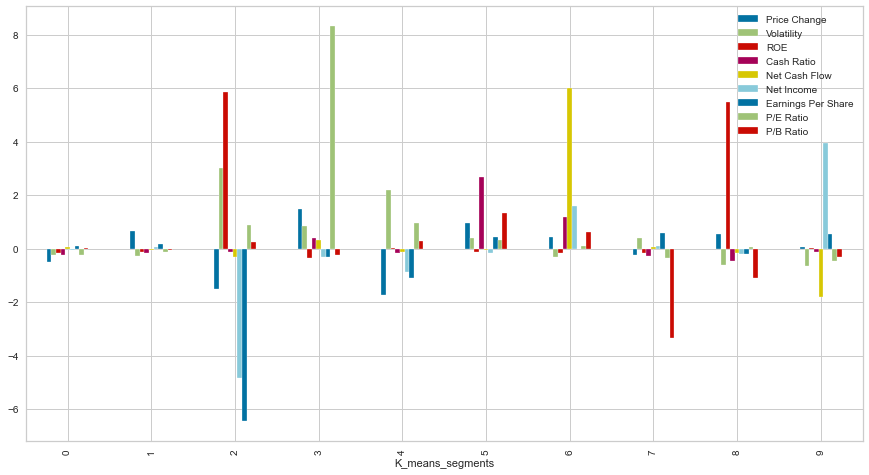

In [44]:
# Overview of indicators for each cluster
scaled_df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 8))

Since all the variables are related to risk, performance or financial situation of a stock, the best stocks would have all the variable on the positive side. This is not the case in any segment, so for every segment there is some negative aspect. 

If measures have a negative deviation this is not good, because it means either losses or negative risk taken. 

Clusters having more positive deviations than negative may be good, because it means that their positive measures on financial situation surpass the negative ones.

Price change and Volatility are trick variables, because we can argue that very high positive values are good, thought that also means they can turn back to very high negative values too. Meanwhile, all our analysis is based on static information from past performance, while the market (stock prices) is a dynamic environement. Stocks price are not a reflection of the past performance, but a perception of future performance, the past is only used to support future predictions and check reliability and strategic decisions.

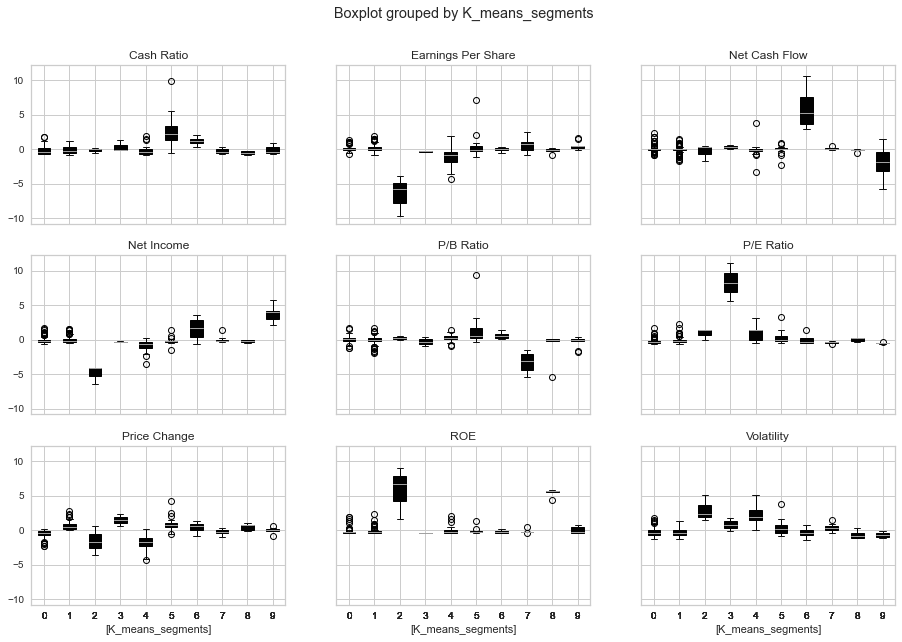

In [45]:
scaled_df.boxplot(by="K_means_segments", layout = (3,3),figsize=(15,10), patch_artist=True)
plt.show()

Again the best clusters should have all boxplots above zero, but we can see that for all indicators the average boxplots are in the middle and only one or two groups stand out. The group stading out is not the same it intercalates between the indicators.

# Hierarchical Clustering

In [46]:
# Data preparation making a diferent copy of the initial files
df1 = df.copy() # original file
HCscaled_df = scaled_df.copy() # scaled file

In [47]:
df1.columns

Index(['Ticker Symbol', 'Security', 'Price Change', 'Volatility', 'ROE',
       'Cash Ratio', 'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'P/E Ratio', 'P/B Ratio', 'K_means_segments'],
      dtype='object')

In [48]:
HCscaled_df.columns

Index(['Price Change', 'Volatility', 'ROE', 'Cash Ratio', 'Net Cash Flow',
       'Net Income', 'Earnings Per Share', 'P/E Ratio', 'P/B Ratio',
       'K_means_segments'],
      dtype='object')

In [49]:
df1.drop('K_means_segments', axis=1, inplace=True) # column shall not be used in the hierarchical cluster method

In [50]:
HCscaled_df.drop('K_means_segments', axis=1, inplace=True) # column shall not be used in the hierarchical cluster method

In [51]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(HCscaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(HCscaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9112335225098491.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7604992691476465.
Cophenetic correlation for Euclidean distance and average linkage is 0.9263734185091688.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.75574124627737.
Cophenetic correlation for Chebyshev distance and single linkage is 0.890312031059944.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.7958352665736017.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9178727836225057.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8872967580222862.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.8996916010065141.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.8177671898830695.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9122298006847792.
Cophenetic corre

In [52]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9263734185091688, which is obtained with Euclidean distance and average linkage.


In [53]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(HCscaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(HCscaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9112335225098491.
Cophenetic correlation for complete linkage is 0.7604992691476465.
Cophenetic correlation for average linkage is 0.9263734185091688.
Cophenetic correlation for centroid linkage is 0.9324886481724464.
Cophenetic correlation for ward linkage is 0.5850129054383896.
Cophenetic correlation for weighted linkage is 0.75574124627737.


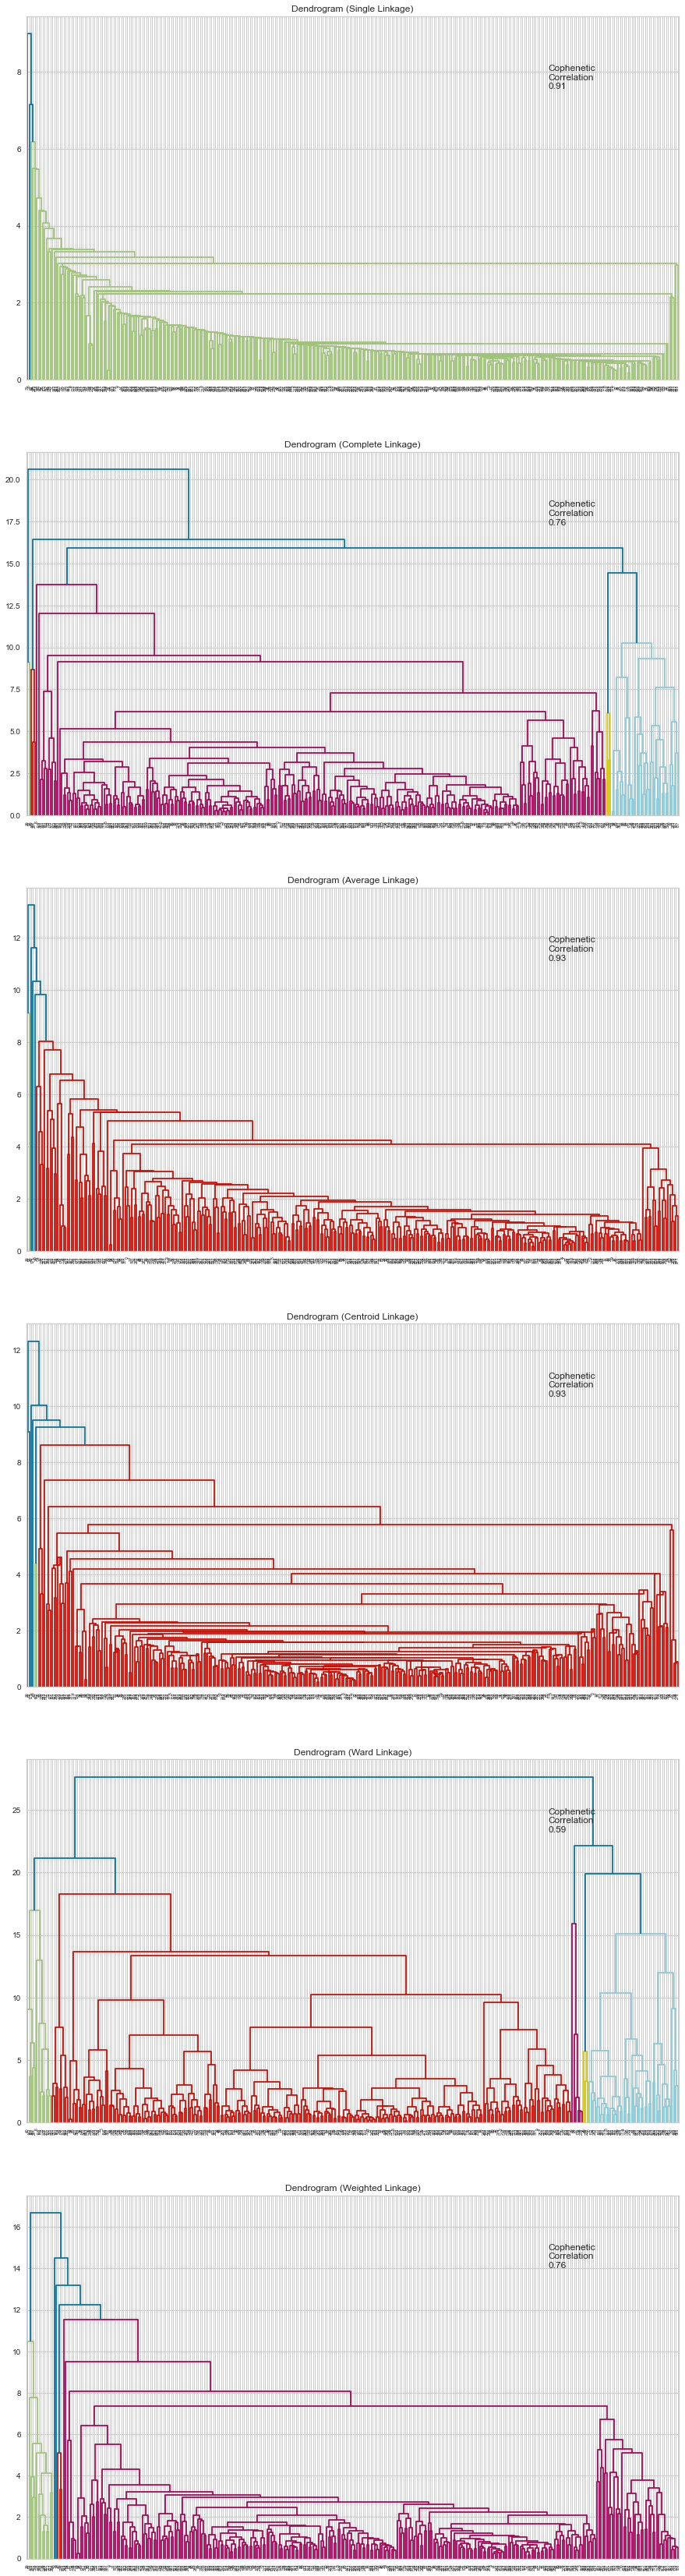

In [54]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 60))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(HCscaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(HCscaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**Despite the fact that cophenetic correlation is higher in many different Linkage Methods, these high indexes also shows a high concentration of stocks in one group, while other groups have very few stocks. This is not a good measure for cluster, unless there is a really strong evidence that few variables are really much better/different then the greater part** This is not evident from the kmeans analysis  and for this reason I decided to choose a linkage that weights more stocks in the many different clusters.

In [55]:
# let's create a dataframe to compare cophenetic correlations for each linkage method
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.911234
1,complete,0.760499
2,average,0.926373
3,centroid,0.932489
4,ward,0.585013
5,weighted,0.755741


In [56]:
# Checking the model with 7 clusters 
HCmodel7 = AgglomerativeClustering(n_clusters=7, affinity="euclidean", linkage="ward")
HCmodel7.fit(HCscaled_df)

AgglomerativeClustering(n_clusters=7)

In [57]:
HCscaled_df["HC_Clusters"] = HCmodel7.labels_
df1["HC_Clusters"] = HCmodel7.labels_

In [58]:
HCcluster7 = df1.groupby("HC_Clusters").mean()
HCclustersc7 = HCscaled_df.groupby("HC_Clusters").mean()

In [59]:
HCcluster7["count_per_segments"] = (
    df1.groupby("HC_Clusters")["P/E Ratio"].count().values
)

In [60]:
HCclustersc7["count_per_segments"] = (
    HCscaled_df.groupby("HC_Clusters")["P/E Ratio"].count().values
)

In [61]:
# let's display cluster profiles
HCclustersc7.style.highlight_max(color="lightgreen", axis=0)

,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,P/E Ratio,P/B Ratio,count_per_segments
HC_Clusters,,,,,,,,,,
0,0.564665,-0.260037,6.068844,-0.382370,-0.088245,-1.230970,-1.776606,0.270637,-0.824307,6
1,-1.548435,1.426138,0.099522,-0.066243,-0.215710,-0.726464,-0.768002,0.636373,0.269976,47
2,0.656836,-0.108184,-0.243472,4.222326,0.119519,-0.117587,0.332671,-0.014920,2.298367,8
3,0.225768,-0.241717,-0.141951,-0.125897,-0.010508,0.004919,0.153406,-0.199327,-0.097320,262
4,1.488004,0.852517,-0.369243,0.398462,0.330693,-0.306744,-0.308093,8.318604,-0.258428,3
5,0.066099,-0.635186,0.019163,-0.118401,-1.821046,3.939306,0.560954,-0.478620,-0.303009,9
6,-0.015275,0.377219,-0.203277,0.896866,5.572409,1.329590,-0.044490,0.032273,0.574074,5


Ward Linkage shows one group with 262 stocks or 77% of the total number, which is a similar behavior as the kmeans analysis. Meanwhile, another group has 47 Stocks, which are the summ of cluster 4 and 5 in kmeans.
The other groups have also less than 10 stocks.
Due to these similarities, lets group with the same amount of clusters as before.

In [62]:
# Check the model with 10 clusters
HCmodel = AgglomerativeClustering(n_clusters=10, affinity="euclidean", linkage="ward")
HCmodel.fit(HCscaled_df)

AgglomerativeClustering(n_clusters=10)

In [63]:
HCscaled_df["HC_Clusters"] = HCmodel.labels_
df1["HC_Clusters"] = HCmodel.labels_

In [64]:
HCcluster_profile = df1.groupby("HC_Clusters").mean()
HCcluster_profilesc = HCscaled_df.groupby("HC_Clusters").mean()

In [65]:
HCcluster_profile["count_per_segments"] = (
    df1.groupby("HC_Clusters")["P/E Ratio"].count().values
)

In [66]:
HCcluster_profilesc["count_per_segments"] = (
    HCscaled_df.groupby("HC_Clusters")["P/E Ratio"].count().values
)

In [67]:
# let's display cluster profiles
HCcluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,P/E Ratio,P/B Ratio,count_per_segments
HC_Clusters,,,,,,,,,,
0,6.968634,1.372457,26.207843,58.992157,34640298.039216,1524161282.352941,3.756804,23.916427,-1.739943,255
1,11.952783,1.462047,16.125000,451.250000,287822500.000000,1031755625.000000,4.965000,31.951870,30.335596,8
2,3.895063,1.748885,20.000000,151.000000,10885520000.000000,6725460000.000000,2.484000,34.041715,6.287989,5
3,-24.524107,3.355549,123.142857,32.214286,-358935071.428571,-3814594500.000000,-8.957143,70.631132,-0.111767,14
4,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,400.989188,-5.322376,3
5,4.870635,1.150627,41.444444,59.333333,-3483666666.666667,16993000000.000000,6.466667,11.417607,-5.944119,9
6,10.737770,1.165694,566.200000,26.600000,-278760000.000000,687180000.000000,1.548000,34.898915,-16.851358,5
7,11.397804,2.405408,917.000000,80.000000,698000000.000000,-23528000000.000000,-61.200000,93.089287,4.970809,1
8,-10.226666,1.950065,17.818182,77.545455,-365715000.000000,-324042121.212121,0.559394,56.619742,2.962741,33


In [68]:
# let's display cluster profiles
HCcluster_profilesc.style.highlight_max(color="lightgreen", axis=0)

,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,P/E Ratio,P/B Ratio,count_per_segments
HC_Clusters,,,,,,,,,,
0,0.241098,-0.259794,-0.138884,-0.122179,-0.010752,0.007568,0.149001,-0.196374,-0.001555,255
1,0.656836,-0.108184,-0.243472,4.222326,0.119519,-0.117587,0.332671,-0.014920,2.298367,8
2,-0.015275,0.377219,-0.203277,0.896866,5.572409,1.329590,-0.044490,0.032273,0.574074,5
3,-2.385778,3.096104,0.866609,-0.418761,-0.213261,-1.349391,-1.783772,0.858527,0.115190,14
4,1.488004,0.852517,-0.369243,0.398462,0.330693,-0.306744,-0.308093,8.318604,-0.258428,3
5,0.066099,-0.635186,0.019163,-0.118401,-1.821046,3.939306,0.560954,-0.478620,-0.303009,9
6,0.555489,-0.609690,5.462377,-0.480943,-0.172008,-0.205168,-0.186781,0.051630,-1.085094,5
7,0.610544,1.488223,9.101176,0.110496,0.330570,-6.359977,-9.725729,1.365673,0.479628,1
8,-1.193198,0.717667,-0.225909,0.083310,-0.216749,-0.462192,-0.337069,0.542125,0.335643,33


With the same amount of clusters as kmeans, HC did concentrate more stocks into one group (0), which represents 75% of the total. Two other clusters have between 14 and 33 stocks, while the rest has less than 9 stocks. The cluster distribution of both methods show a high concentration of stocks in one/two cluster, while around 25% of them can be separated into different groups that outstand from the majority.

In [69]:
# let's see the names of the countries in each cluster
for cl in df1["HC_Clusters"].unique():
    print(
        "The",
        df1[df1["HC_Clusters"] == cl]["Security"].nunique(),
        "countries in cluster",
        cl,
        "are:",
    )
    print(df1[df1["HC_Clusters"] == cl]["Security"].unique())
    print("-" * 100, "\n")

The 255 countries in cluster 0 are:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Albemarle Corp'
 'Alaska Air Group Inc' 'Allstate Corp' 'Applied Materials Inc'
 'AMETEK Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'AutoNation Inc' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'BIOGEN IDEC Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle International Corp.'
 'Carnival Corp.' 'Celgene Corp.' 'Citizens Financial Group'
 'Church & Dwight' 'C. H. Robinson Worldwide

<AxesSubplot:xlabel='HC_Clusters'>

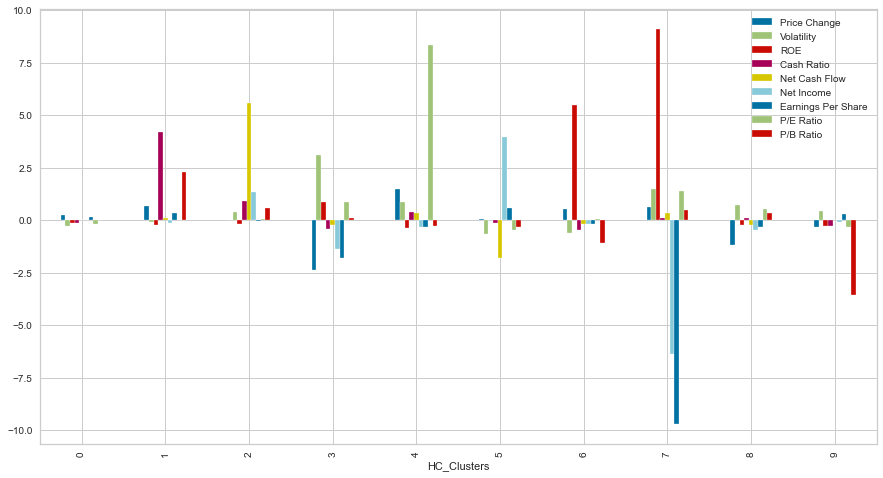

In [70]:
HCscaled_df.groupby("HC_Clusters").mean().plot.bar(figsize=(15, 8))

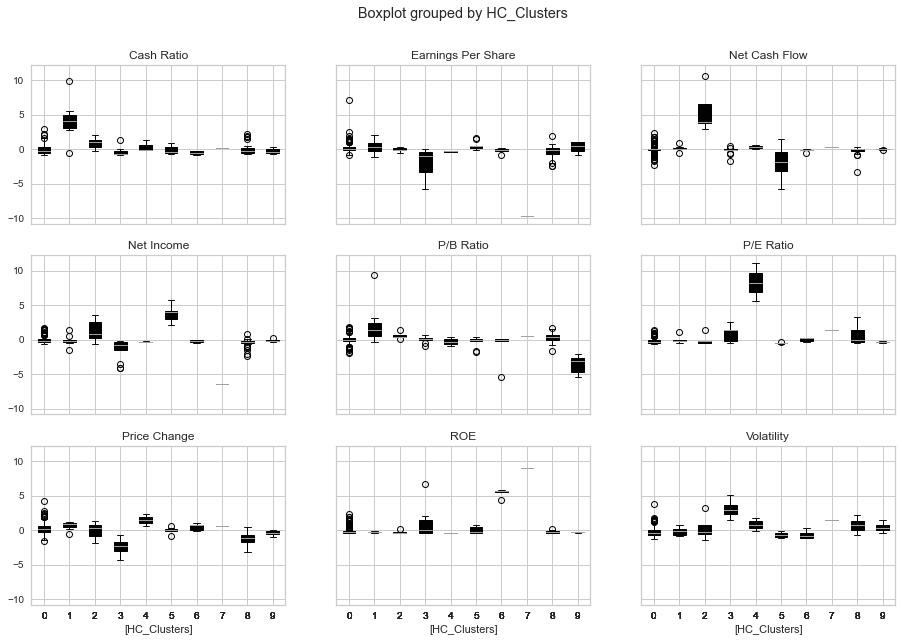

In [71]:
HCscaled_df.boxplot(by="HC_Clusters", layout = (3,3),figsize=(15,10), patch_artist=True)
plt.show()

The Graphic behavior of HC is similar to the Kmean clusters. Deeper analysis will be done below.

# K-means vs Hierarchical Clustering

Comparing the outputs for both clustering methods

In [74]:
data["K_means_segments"] = kmeans.labels_ # using the firs data set

In [75]:
cluster_profile = data.groupby("K_means_segments").mean()

In [76]:
cluster_profile["count_in_each_segments"] = (
    data.groupby("K_means_segments")["P/E Ratio"].count().values
)

In [77]:
data["HC_Clusters"] = HCmodel.labels_ # join the clusters into the same data set

In [78]:
HCcluster_profile = data.groupby("HC_Clusters").mean()

In [79]:
HCcluster_profile["count_per_segments"] = (
    data.groupby("HC_Clusters")["P/E Ratio"].count().values
)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

The Pivot Table below shows that for some clusters in Kmeans we have the same Securities for Hierarchical Clusters.
This means that the clusters below have the same characteristics (100% comparable) in both methods and reinforce the fact they belong together.
- Kmeans 8 -> HC 6
- Kmeans 6 -> HC 2
- Kmeans 3 -> HC 4
- Kmeans 9 -> HC 5
- Kmeans 7 -> HC 9

For the bigger one, HC grouped the majority of stocks in one cluster, while Kmeans separated them into two groups. Though, the summ of clusters 0 & 1 in kmeans is equal to cluster 0 in HC
- Kmeans 0+1 -> HC 0 

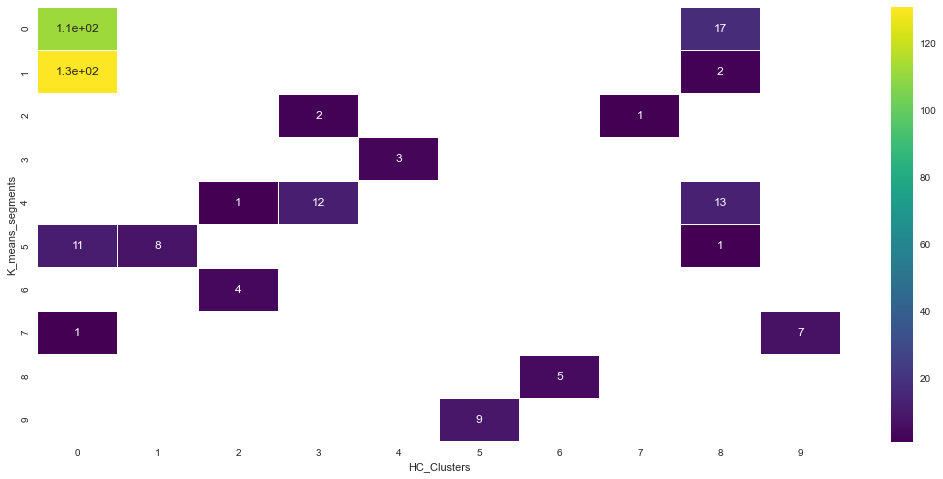

In [81]:
df_hm = data.pivot_table(
    index="K_means_segments", columns="HC_Clusters", values="Security", aggfunc= 'count'
)

# Draw a heatmap
f, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(df_hm, cmap="viridis", linewidths=0.5, annot=True, ax=ax)
plt.show()

In [82]:
# Below are some groups that have exactly the same list of Securities and therefore the same indicators
print(data[data["K_means_segments"] == 8]["Security"].unique())
print ("similar")
print(data[data["HC_Clusters"] == 6]["Security"].unique())

['Allegion' 'Charter Communications' 'Colgate-Palmolive' 'Kimberly-Clark'
 'S&P Global, Inc.']
similar
['Allegion' 'Charter Communications' 'Colgate-Palmolive' 'Kimberly-Clark'
 'S&P Global, Inc.']


In [83]:
print(data[data["K_means_segments"] == 3]["Security"].unique())
print ("similar")
print(data[data["HC_Clusters"] == 4]["Security"].unique())

['Alexion Pharmaceuticals' 'Amazon.com Inc' 'Netflix Inc.']
similar
['Alexion Pharmaceuticals' 'Amazon.com Inc' 'Netflix Inc.']


In [84]:
print(data[data["K_means_segments"] == 9]["Security"].unique())
print ("similar")
print(data[data["HC_Clusters"] == 5]["Security"].unique())

['Citigroup Inc.' 'Gilead Sciences' 'General Motors'
 'International Business Machines' 'JPMorgan Chase & Co.' 'AT&T Inc'
 'Verizon Communications' 'Wells Fargo' 'Exxon Mobil Corp.']
similar
['Citigroup Inc.' 'Gilead Sciences' 'General Motors'
 'International Business Machines' 'JPMorgan Chase & Co.' 'AT&T Inc'
 'Verizon Communications' 'Wells Fargo' 'Exxon Mobil Corp.']


In [85]:
#These are groups that have the majority of securities identical, adding only one additional to the group 
print(data[data["K_means_segments"] == 6]["Security"].unique())
print ("similar")
print(data[data["HC_Clusters"] == 2]["Security"].unique())

['Bank of America Corp' 'Halliburton Co.' 'Intel Corp.' "McDonald's Corp."]
similar
['Bank of America Corp' 'Halliburton Co.' 'Hewlett Packard Enterprise'
 'Intel Corp.' "McDonald's Corp."]


In [86]:
print(data[data["K_means_segments"] == 7]["Security"].unique())
print ("similar")
print(data[data["HC_Clusters"] == 9]["Security"].unique())

['Affiliated Managers Group Inc' 'Anthem Inc.' 'CME Group Inc.'
 'Discovery Communications-A' 'Discovery Communications-C' 'Expedia Inc.'
 'United Continental Holdings' 'Whirlpool Corp.']
similar
['Affiliated Managers Group Inc' 'Anthem Inc.' 'CME Group Inc.'
 'Discovery Communications-A' 'Discovery Communications-C' 'Expedia Inc.'
 'Whirlpool Corp.']


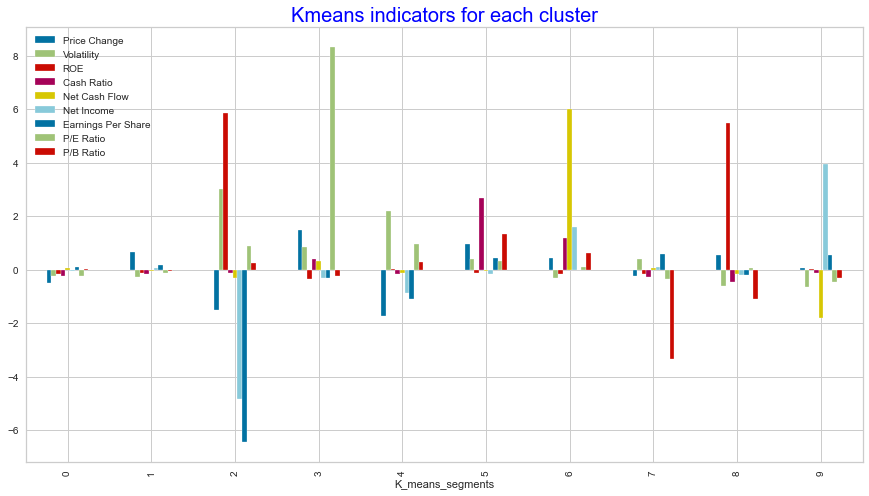

In [87]:
scaled_df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 8), legend=False)
plt.legend(loc='upper left')
plt.title("Kmeans indicators for each cluster", fontsize= 20, color='Blue')
plt.show()

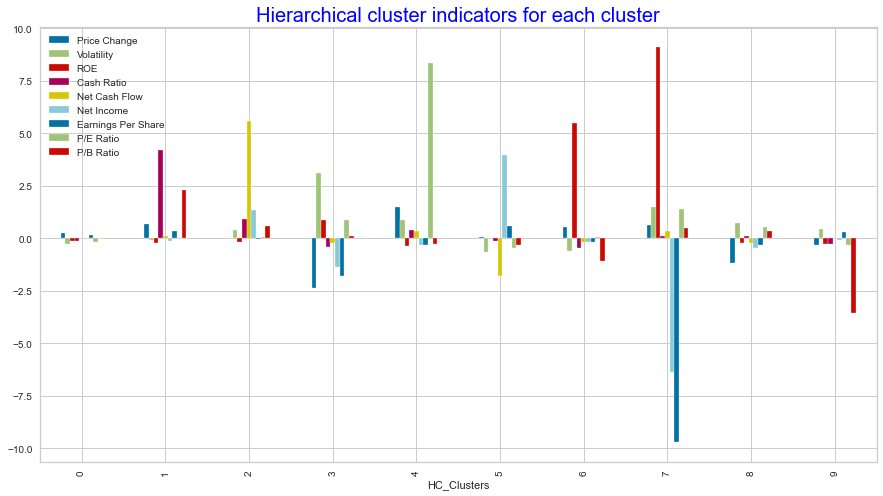

In [88]:
HCscaled_df.groupby("HC_Clusters").mean().plot.bar(figsize=(15, 8), legend= False)
plt.legend(loc='upper left')
plt.title("Hierarchical cluster indicators for each cluster", fontsize= 20, color='Blue')
plt.show()

Based on the comparable graphs between kmeans and HC we can see that the majority of the groups are similar and therefore the key indicators also behave the same way. Insight on each one is below.


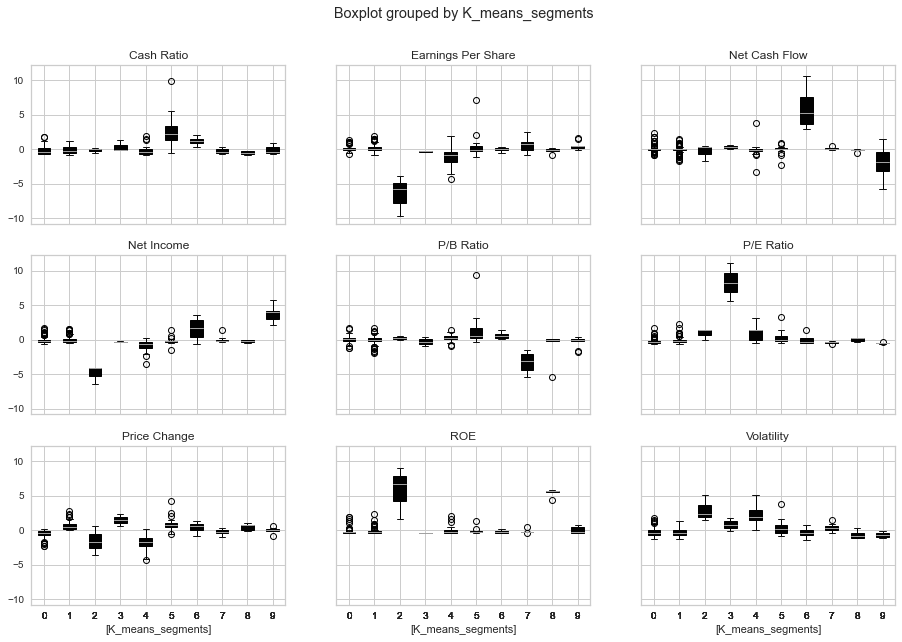

In [89]:
scaled_df.boxplot(by="K_means_segments", layout = (3,3),figsize=(15,10), patch_artist=True)
plt.show()

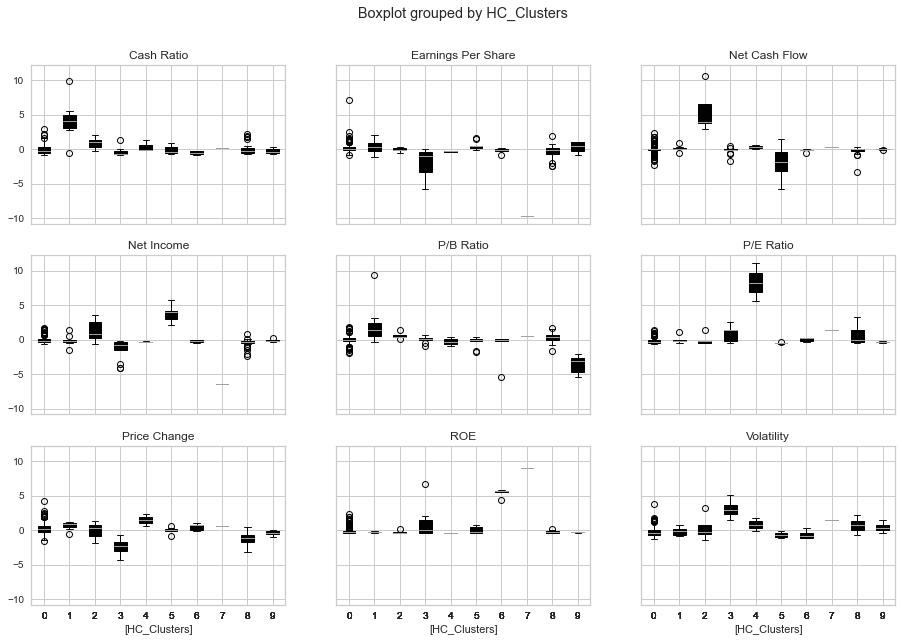

In [90]:
HCscaled_df.boxplot(by="HC_Clusters", layout = (3,3),figsize=(15,10), patch_artist=True)
plt.show()

Scaled Indexes for each cluster also shows that none of the clusters has an outstanding performance compared to the other. Most of the Indexes have low variance and only one or two outstands in a cluster. Therefore, none of the clusters is much better than the other, each one has one /two strong indexes, but overall they are average.

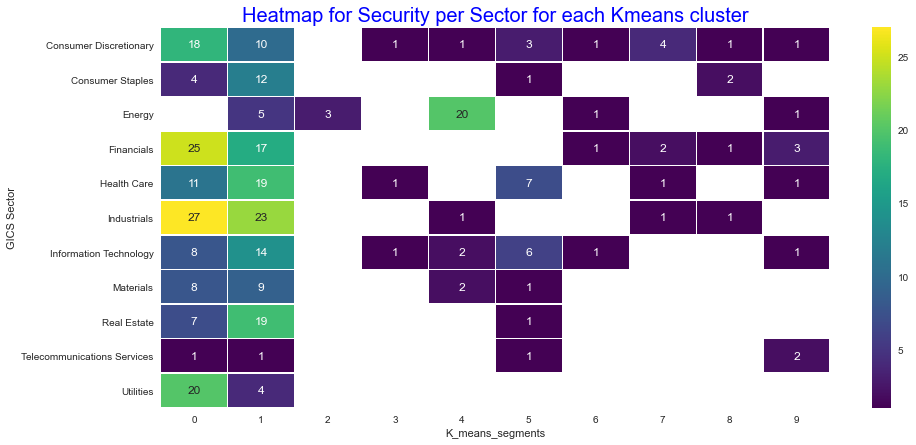

In [91]:
sc_hm2 = data.pivot_table(
    index="GICS Sector", columns="K_means_segments", values="Security", aggfunc='count'
)

# Draw a heatmap
f, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(sc_hm2, cmap="viridis", linewidths=0.5, annot=True, ax=ax)
plt.title("Heatmap for Security per Sector for each Kmeans cluster", fontsize= 20, color='Blue')
plt.show()

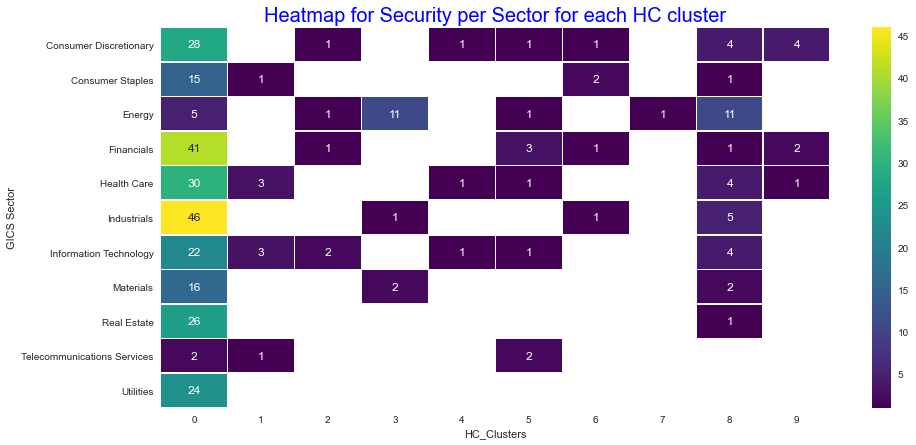

In [92]:
sc_hm1 = data.pivot_table(
    index="GICS Sector", columns="HC_Clusters", values="Security", aggfunc='count'
)

# Draw a heatmap
f, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(sc_hm1, cmap="viridis", linewidths=0.5, annot=True, ax=ax)
plt.title("Heatmap for Security per Sector for each HC cluster", fontsize= 20, color='Blue')
plt.show()

The graphs above show if the Clusters have a good mix of securities in different sectors. Most of them are well balanced, which shows that clustering was not influenced by one specific characteristic of a sector.

## Actionable Insights and Recommendations

- Kmeans cluster 0 & 1 => HC Cluster 0

The cluster include the majority of stocks and show very low deviation for all indicators in the group. Securities have steady returns and low risks. Because these clusters have a very high number of stocks it is a reflect of the benefits of diversification. For long term investments that require steady return and low risk, this is a good option (pension funds).

- Kmeans cluster 2 => HC Cluster 7 

The cluster do not have many stocks, therefore they are highly influenced by the performance of one. HC Cluster 7 has actually one security, which is also in kmeans cluster 2. These stocks are highly volatily and risk, since their major index have higher standard deviation.

- Kmeans cluster 3 => HC Cluster 4

Both have the same three stocks, therefore perform exactly the same. Since we are talking about Firms with high growth potentital whith track record of double digit growth, P/E Ratio is by far the highest between clusters, which shows that these stocks are probably too expensive compared to the others. Volatility (Risk) is also considerable. 

- Kmeans cluster 4 => HC Cluster 3

Even though Kmeans cluster has double securities than HC cluster, the performance of these cluster are similar. High volatility with high negative price change. Most stock have negative earnings and cash ratio. All other indexes are closed to average, which shows that the risk is definately too high compared to the performance (indexes).

- Kmeans cluster 5 => HC cluster 0 & 1

This cluster has many no direct comparable in HC, though its financial indicators are not so bad. Average cash ratio is higher than other clusters, though average income is slightly negative. Price/Book value is the highest among all kmean clusters. Its financials reflect its concentration in IT and health care.


- Kmeans cluster 6 => HC cluster 2

This cluster only defer by one stock (HP), which brings extra force to its profile that includes high cash ratio and cash income, as well as net income. Since P/B and P/E are not so high, these stocks seem to have foundations and are not over valued by the market (excluding Halliburton Co.).

- Kmeans cluster 7 => HC cluster 9

This clusters have very similar behavior to kmeans cluster 0 & 1, indicators close to zero without big variances, only that the Book value for them is extremely negative, which shows these companies have been accumulating losses over the years, even though their income and cash are not negative this period.


- Kmeans cluster 8 => HC cluster 6

The same securities are in both clusters and show the ROE very high, while oder indexes negatively low. Individually most of the stocks have similar metrics, only Charter Communications stands out in opposite direction is most indexes, despite being clustered in this group.


- Kmeans cluster 9 => HC cluster 5

These clusters have net income with high deviation from mean while oder variables are close to the mean, either positively or negatively. Securities are also the same and have no business sector prevails.


### Final Recomendation

For investments in long term that require low risk and low to moderate return, the following Cluster are best option:
* Kmeans cluster 0 & 1 => HC Cluster 0
* Kmeans cluster 5 => HC cluster 0 & 1

For investments that accept moderate risk and return, the following clusers are good options:
* Kmeans cluster 3 => HC Cluster 4
* Kmeans cluster 4 => HC Cluster 3
* Kmeans cluster 5 => HC cluster 0 & 1
* Kmeans cluster 6 => HC cluster 2
* Kmeans cluster 7 => HC cluster 9
* Kmeans cluster 8 => HC cluster 6
* Kmeans cluster 9 => HC cluster 5

For investments that prefer high risk with high return, the following cluster is appropriate:
* Kmeans cluster 2 => HC Cluster 7 
